**Setup**

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


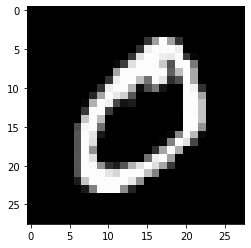

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 1
image = x_train[sample]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

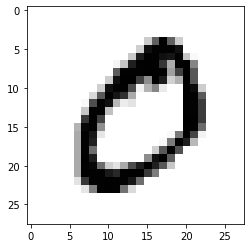

In [4]:
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

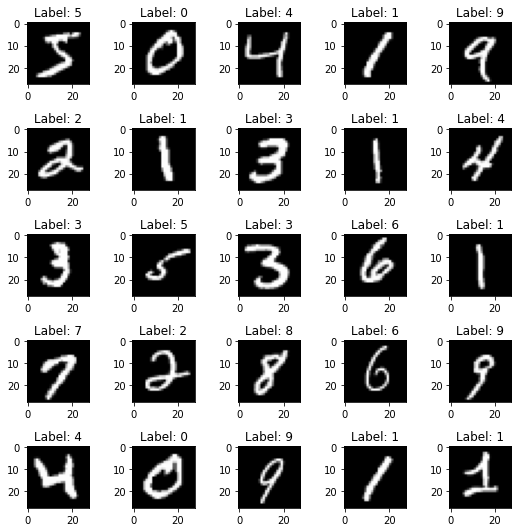

In [5]:
num = 25
images = x_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,1.5*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [7]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [10]:
#Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

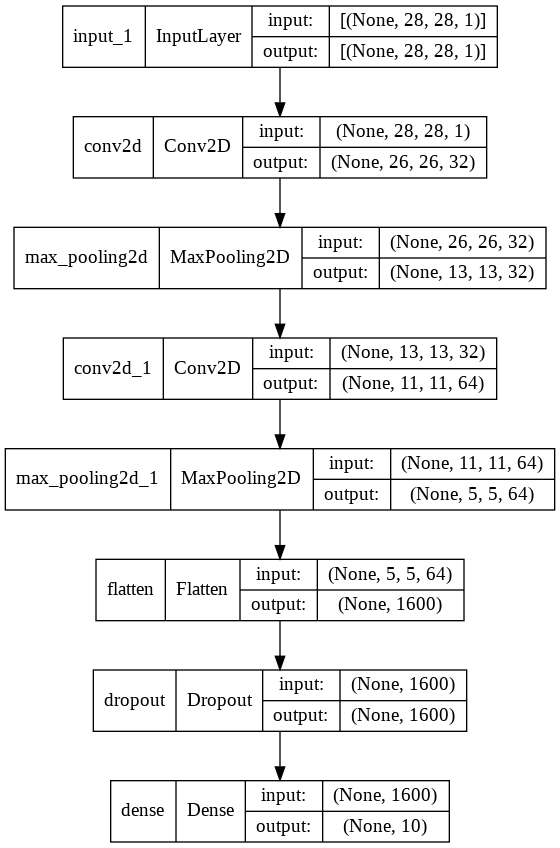

In [11]:
keras.utils.plot_model(model, show_shapes=True)

In [12]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 12ms/step - loss: 0.3518 - accuracy: 0.8932 - val_loss: 0.0815 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 5s 11ms/step - loss: 0.1060 - accuracy: 0.9670 - val_loss: 0.0501 - val_accuracy: 0.9880
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0820 - accuracy: 0.9749 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0688 - accuracy: 0.9783 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0349 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0323 - val_accuracy: 0.991

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02519887685775757
Test accuracy: 0.991100013256073
